1953: Harry Markowits stated that all eggs shouldn ot be in pone basket. Optimization of portfolo base on the accepted abount of risk. INvestments should not be analyzed individually but in a portfolio. Securties should be observes with interaction with each other in a ortfolio. Low correlation can optimize retuen without assuming additionlal risk. 

In [2]:
import pandas as pd 
import numpy as np 
from pandas_datareader import data as web 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
assets = ["PG", "^GSPC"]
pf_data = pd.DataFrame()
for a in assets:
    pf_data[a] = web.DataReader(a , data_source = "yahoo", start = "2010-1-1")["Adj Close"]

In [5]:
pf_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2491 entries, 2010-01-04 to 2019-11-22
Data columns (total 2 columns):
PG       2491 non-null float64
^GSPC    2491 non-null float64
dtypes: float64(2)
memory usage: 58.4 KB


In [6]:
pf_data.tail()

,PG,^GSPC
Date,,
2019-11-18,121.889999,3122.030029
2019-11-19,121.419998,3120.179932
2019-11-20,122.290001,3108.459961
2019-11-21,120.339996,3103.540039
2019-11-22,120.290001,3110.290039


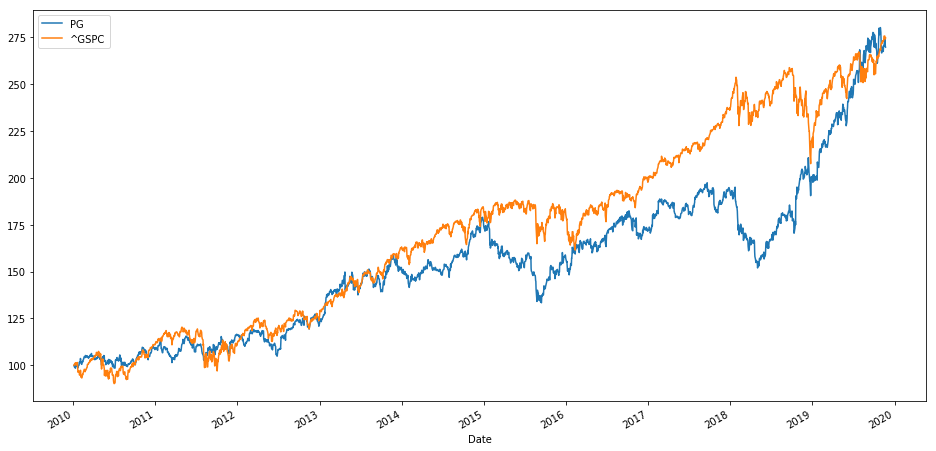

In [9]:
# check the performance of both securities 
(pf_data/pf_data.iloc[0] * 100).plot(figsize = (16,8))
plt.show()

In [13]:
#let get the log returns for the portfolio 
log_returns = np.log(pf_data/pf_data.shift(1))

In [15]:
log_returns.tail()

,PG,^GSPC
Date,,
2019-11-18,0.011137,0.000503
2019-11-19,-0.003863,-0.000593
2019-11-20,0.007140,-0.003763
2019-11-21,-0.016074,-0.001584
2019-11-22,-0.000416,0.002173


In [18]:
#lets get the average return of the two securties 
return_Average = log_returns.mean() * 250
return_Average

PG       0.099579
^GSPC    0.101391
dtype: float64

In [19]:
#check the covarience for the portfolio 
log_returns.cov() * 250

,PG,^GSPC
PG,0.021842,0.011397
^GSPC,0.011397,0.021864


In [20]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.521499
^GSPC,0.521499,1.000000


In [21]:
#create a constant of the length of the securities we are analyzing 
num_asset = len(assets)
num_asset

2

In [24]:
#calclute the weights of the portfolio 
weights = np.random.random(num_asset)
weights /= np.sum(weights)
weights

array([0.35641875, 0.64358125])

In [25]:
weights[0] + weights[1]

1.0